In [1]:
# Importing the required functions
from states_functions import *

# File path to the dataset
file_path = "CU_Dynamic/CU005/BW-VTC-447_7686_CU_cyc_005_BW-VTC-AgeVal.mat"

# Load and process data
data = process_states(file_path)


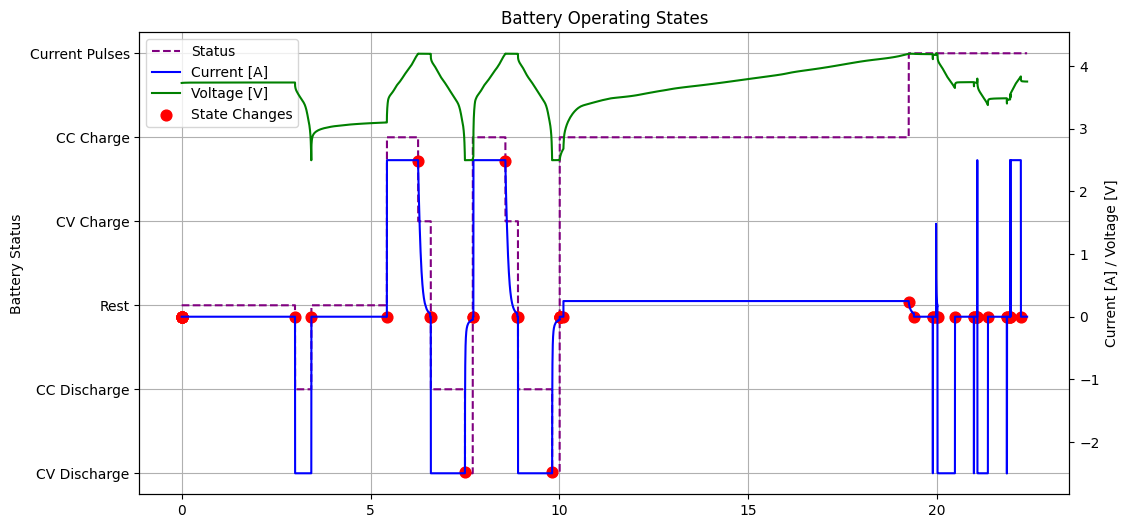

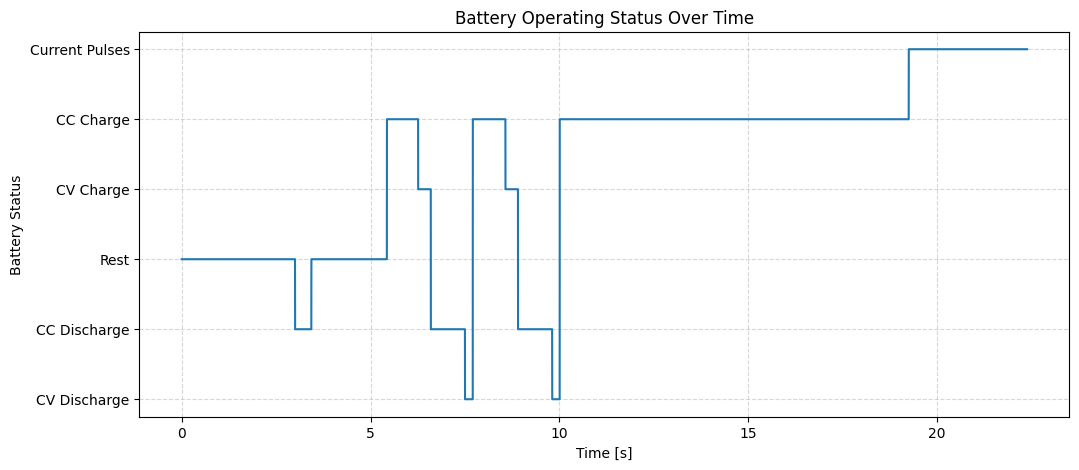

In [ ]:
# Análise Status da bateria ao longo do tempo
plot_battery_data(data)
plot_battery_status(data)

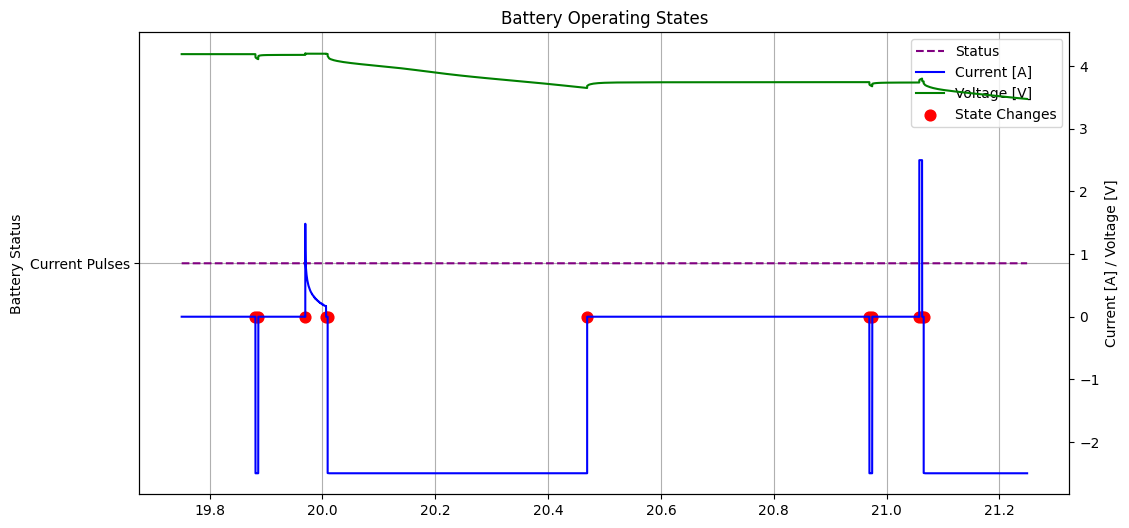

In [ ]:
# Análise pulsos de corrente
plot_battery_data(data, start=19.75, end=21.25)
